<h1> Velocity Distributions Before And After Skin Regrowth </h1>

<h2>1. Imports And Data Loading </h2>

In [1]:
# Imports 
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from scipy import stats

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

In [4]:
# Load the data
df = pd.read_csv("instant_velocity_aggregated.csv")

#split the before and after velocity columns
x1 = df.iloc[0:63]
x2 = df.iloc[64:213]

df_before = x1.melt('Time', var_name='cols',  value_name='vals')
df_after = x2.melt('Time', var_name='cols',  value_name='vals')

x1=df_before['Time']
y1=df_before['vals']

x2=df_after['Time']
y2=df_after['vals']

<h2>2. Statistics </h2>

p-value for non-normality is 1.0


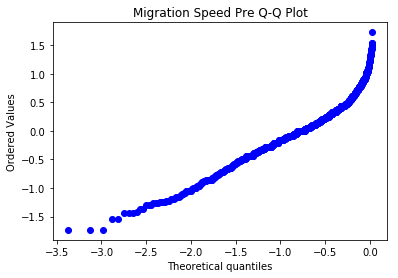

In [11]:
# Test for normality in  velocities before skin healing

stats.probplot(y1, plot= plt)
plt.title('Migration Speed Pre Q-Q Plot')
print('p-value for non-normality is ' + str(stats.shapiro(y1)[1]))

p-value for non-normality is 1.0


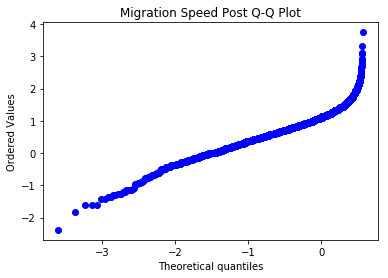

In [12]:
#Test for normality in  velocities after skin healing

stats.probplot(y2, plot= plt)
plt.title('Migration Speed Post Q-Q Plot')
print('p-value for non-normality is ' + str(stats.shapiro(y2)[1]))

In [15]:
#calculate means for each group

mean_pre = y1.mean()
mean_pre = round(mean_pre, 3)
print("mean velocity before healing = " + str(mean_pre) + "um")

mean_post = y2.mean()
mean_post = round(mean_post, 3)
print("mean velocity after healing = " + str(mean_post) + "um\n")

#peform an unpaired t-test

p_value = stats.ttest_ind(y1.dropna(), y2.dropna())


print(str(p_value))

mean velocity before healing = 0.067um
mean velocity after healing = 0.807um

Ttest_indResult(statistic=-31.835713832916987, pvalue=3.1318874906748023e-199)


<h2>3. Make The Plot </h3>

0.8071534666259799
0.6481045112530083


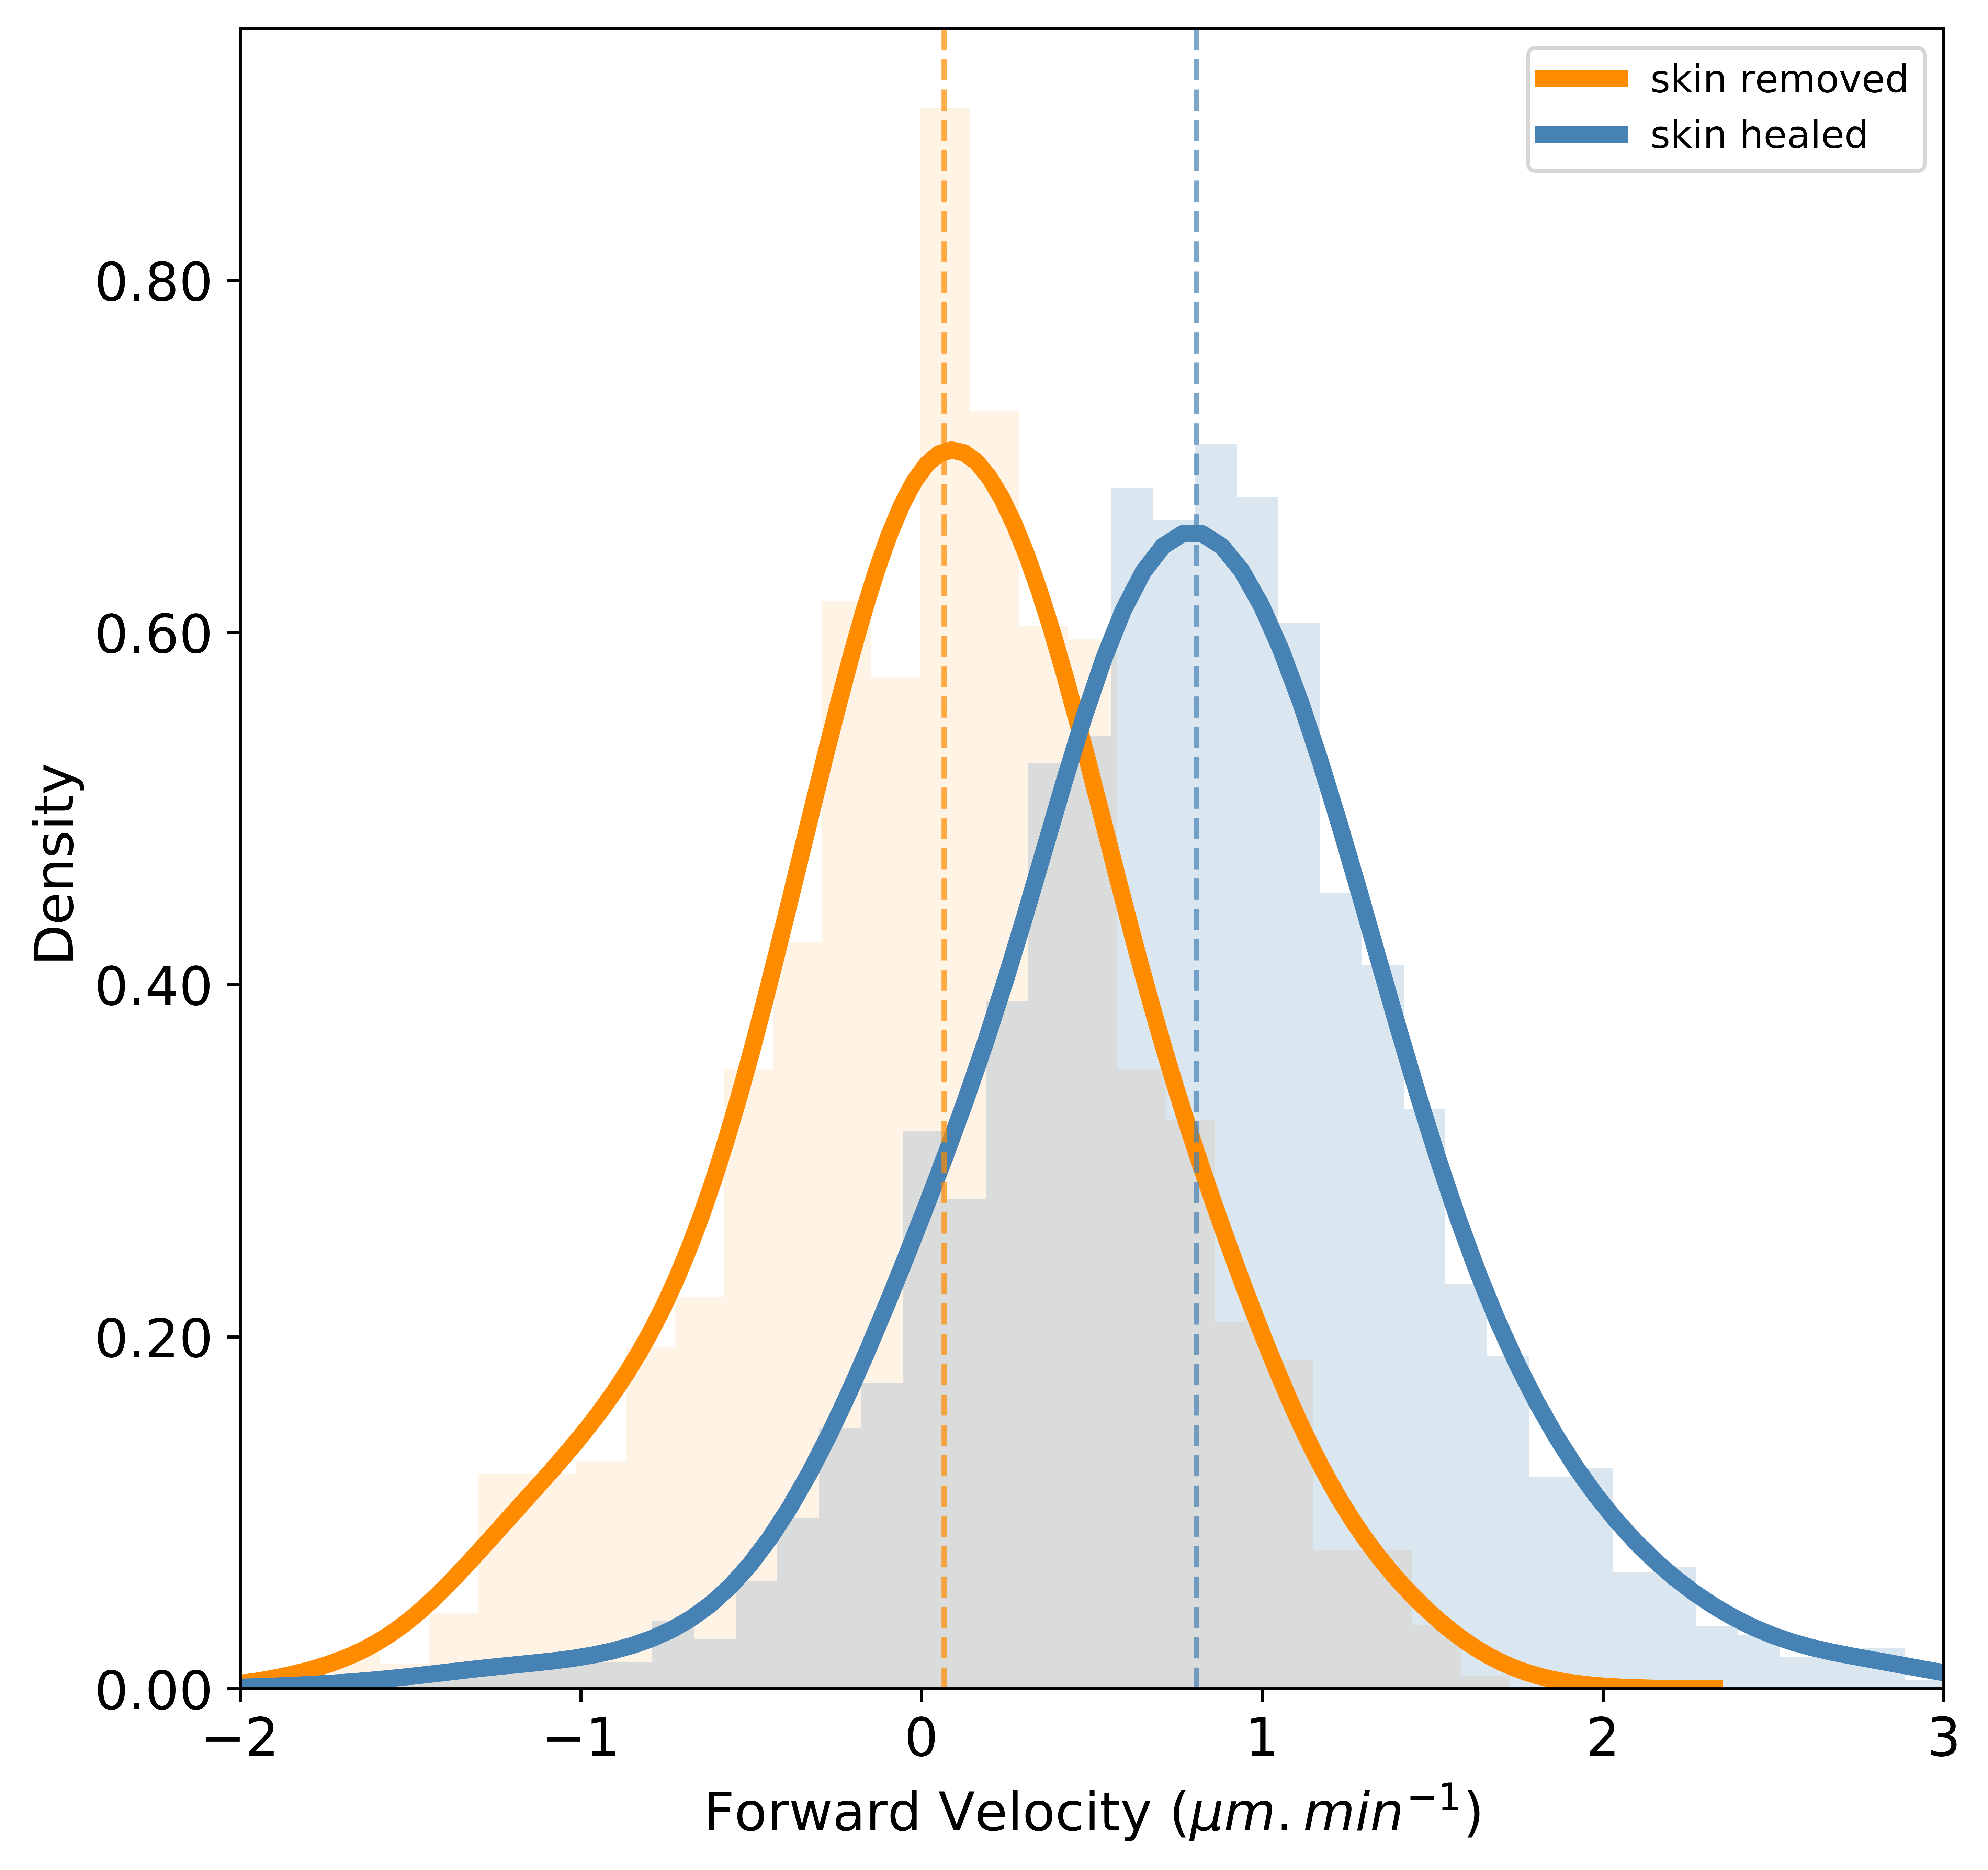

In [16]:

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 800)

current_palette = sns.color_palette()

myDistPlot = sns.distplot(y1.dropna(), label='', color="darkorange", norm_hist=True,  hist_kws=dict(alpha=.1), kde=False)
sns.kdeplot(y1.dropna(), bw=.2, linestyle="-", color="darkorange", label="skin removed", lw=4.5)

    
sns.distplot(y2.dropna(), label='', color="steelblue", norm_hist=True, hist_kws=dict(alpha=.2), kde=False)
sns.kdeplot(y2.dropna(), bw=.2, linestyle="-", color="steelblue", label="skin healed", lw=4.5)

myDistPlot.set_xlim(-2,3)

myMean_1 = y1.dropna().mean()


myDistPlot.axvline(myMean_1, 0,1, linestyle='dashed', alpha=0.7, color="darkorange")

myMean_2 = y2.dropna().mean()
print(myMean_2)

mySD_2 = y2.dropna().std()
print(mySD_2)

myDistPlot.axvline(myMean_2, 0,1, color="steelblue", linestyle='dashed', alpha=0.7)

plt.legend()
plt.ylabel('Density', fontsize=14)
plt.xlabel('Forward Velocity 'r'$(\mu m.min^{-1})$', fontsize=14)
plt.tick_params(labelsize=14)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.savefig("change_in_velocity.png", bbox_inches='tight', dpi=800)